In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("international-airline-passengers.csv", usecols=[1])
df.columns = ["Num of Passengers"]
df.dropna(inplace=True)
df

,Num of Passengers
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0
5,135.0
6,148.0
7,148.0
8,136.0
9,119.0


In [3]:
values = df.values.astype("float32")
values.shape

(144, 1)

In [4]:
train_size = int(values.shape[0] * 0.67)
test_size = values.shape[0] - train_size

train_size, test_size

(96, 48)

In [5]:
train = values[:train_size]
test = values[:test_size]

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [8]:
def create_dataset(data, window_size = 12) :
    X, Y = [], []
    for i in range(data.shape[0] - window_size) :
        X.append(data[i:i+window_size])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

In [9]:
look_back = 12
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [10]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((84, 12, 1), (84, 1), (36, 12, 1), (36, 1))

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(SimpleRNN(units=4, input_shape = (look_back, 1)))
#model.add(Dense(64, activation = 'tanh'))
#model.add(Dense(64, activation = 'tanh'))
model.add(Dense(1))
model.compile(loss="mean_squared_logarithmic_error", optimizer='adam', metrics=['accuracy'])                                                                    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [19]:
for i in range(5) :
    model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose = 0)
    Y_train_pred_scaled = (model.predict(X_train))
    Y_train_pred = scaler.inverse_transform(Y_train_pred_scaled).ravel()

    Y_test_pred_scaled = (model.predict(X_test))
    Y_test_pred = scaler.inverse_transform(Y_test_pred_scaled).ravel()

    Y_train_true = scaler.inverse_transform(Y_train).ravel()
    Y_test_true = scaler.inverse_transform(Y_test).ravel()


    print(mean_squared_error(Y_train_true, Y_train_pred))
    print(mean_squared_error(Y_test_true, Y_test_pred))

    import matplotlib.pyplot as plt
    plt.plot(Y_train_true, label='Y_train_true', c='b')
    plt.plot(Y_test_true, label='Y_test_true', c='b')
    plt.plot(Y_train_pred, label='Y_train_pred', c='r')
    plt.plot(Y_test_pred, label='Y_test_pred', c='r')
    plt.legend()
    plt.show()

485.90518
223.59637


<Figure size 640x480 with 1 Axes>

488.98465
214.53427


<Figure size 640x480 with 1 Axes>

489.6109
261.64883


<Figure size 640x480 with 1 Axes>

520.44104
206.27269


<Figure size 640x480 with 1 Axes>

449.8158
220.5058


<Figure size 640x480 with 1 Axes>

550.705
222.12666


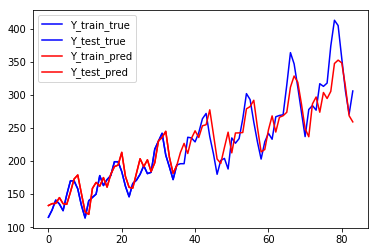